In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import math
import datetime

In [2]:
data_source = './original_data/data1.csv'
df = pd.read_csv(data_source)

In [3]:
df.head()

,index,timestamp,open,close,high,low,volume,buy_volume,sell_volume,max_buy,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
0,0,2019-06-01 00:00:00,8546.0,8544.0,8546.5,8543.5,2863215,1490030,1373185,200000.0,...,160,142,113,95,19,4.0,NaN,201,504,4061.297872
1,1,2019-06-01 00:01:00,8544.5,8557.0,8563.0,8544.0,2058785,1479285,579500,189127.0,...,464,388,252,181,33,1.0,NaN,712,263,2111.574359
2,2,2019-06-01 00:02:00,8556.5,8565.5,8567.5,8556.5,2468185,1224395,1243790,74000.0,...,382,347,232,186,22,0.0,NaN,571,120,3571.903039
3,3,2019-06-01 00:03:00,8566.0,8562.5,8566.0,8557.5,931585,263639,667946,18521.0,...,108,87,65,49,3,0.0,NaN,172,259,2161.450116
4,4,2019-06-01 00:04:00,8563.0,8556.5,8563.0,8556.5,797504,170871,626633,65835.0,...,32,28,23,15,3,0.0,NaN,48,237,2798.259649


In [4]:
df.columns

Index(['index', 'timestamp', 'open', 'close', 'high', 'low', 'volume',
       'buy_volume', 'sell_volume', 'max_buy', 'max_sell', 'sell_50',
       'sell_100', 'sell_500', 'sell_1000', 'sell_10000', 'sell_100000',
       'sell_200000', 'buy_50', 'buy_100', 'buy_500', 'buy_1000', 'buy_10000',
       'buy_100000', 'buy_200000', 'buy_count', 'sell_count', 'avg_volume'],
      dtype='object')

In [5]:
df.timestamp = pd.to_datetime(df.timestamp)

In [6]:
df.set_index('timestamp',inplace=True)

In [7]:
df.sort_index(inplace=True)

In [8]:
df.head()

,index,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,0,8546.0,8544.0,8546.5,8543.5,2863215,1490030,1373185,200000.0,100400.0,...,160,142,113,95,19,4.0,NaN,201,504,4061.297872
2019-06-01 00:01:00,1,8544.5,8557.0,8563.0,8544.0,2058785,1479285,579500,189127.0,90000.0,...,464,388,252,181,33,1.0,NaN,712,263,2111.574359
2019-06-01 00:02:00,2,8556.5,8565.5,8567.5,8556.5,2468185,1224395,1243790,74000.0,214169.0,...,382,347,232,186,22,0.0,NaN,571,120,3571.903039
2019-06-01 00:03:00,3,8566.0,8562.5,8566.0,8557.5,931585,263639,667946,18521.0,111334.0,...,108,87,65,49,3,0.0,NaN,172,259,2161.450116
2019-06-01 00:04:00,4,8563.0,8556.5,8563.0,8556.5,797504,170871,626633,65835.0,121070.0,...,32,28,23,15,3,0.0,NaN,48,237,2798.259649


In [9]:
for column in df.columns:
    if df[column].isna().any():
        print('{} oh shit'.format(column))

open oh shit
close oh shit
high oh shit
low oh shit
max_buy oh shit
max_sell oh shit
sell_10000 oh shit
sell_100000 oh shit
sell_200000 oh shit
buy_100000 oh shit
buy_200000 oh shit
avg_volume oh shit


In [10]:
del df['index']

In [11]:
df['target'] = np.nan
df['target'] = df['target'].astype(np.float64)

In [12]:
df.head()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,8546.0,8544.0,8546.5,8543.5,2863215,1490030,1373185,200000.0,100400.0,398,...,142,113,95,19,4.0,NaN,201,504,4061.297872,NaN
2019-06-01 00:01:00,8544.5,8557.0,8563.0,8544.0,2058785,1479285,579500,189127.0,90000.0,198,...,388,252,181,33,1.0,NaN,712,263,2111.574359,NaN
2019-06-01 00:02:00,8556.5,8565.5,8567.5,8556.5,2468185,1224395,1243790,74000.0,214169.0,91,...,347,232,186,22,0.0,NaN,571,120,3571.903039,NaN
2019-06-01 00:03:00,8566.0,8562.5,8566.0,8557.5,931585,263639,667946,18521.0,111334.0,186,...,87,65,49,3,0.0,NaN,172,259,2161.450116,NaN
2019-06-01 00:04:00,8563.0,8556.5,8563.0,8556.5,797504,170871,626633,65835.0,121070.0,157,...,28,23,15,3,0.0,NaN,48,237,2798.259649,NaN


In [13]:
for i, row in df.iterrows():
    try:
        df.at[i, 'target'] = df.loc[i+datetime.timedelta(minutes=1), 'close']
    except KeyError as e:
        pass

In [14]:
df.head()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,8546.0,8544.0,8546.5,8543.5,2863215,1490030,1373185,200000.0,100400.0,398,...,142,113,95,19,4.0,NaN,201,504,4061.297872,8557.0
2019-06-01 00:01:00,8544.5,8557.0,8563.0,8544.0,2058785,1479285,579500,189127.0,90000.0,198,...,388,252,181,33,1.0,NaN,712,263,2111.574359,8565.5
2019-06-01 00:02:00,8556.5,8565.5,8567.5,8556.5,2468185,1224395,1243790,74000.0,214169.0,91,...,347,232,186,22,0.0,NaN,571,120,3571.903039,8562.5
2019-06-01 00:03:00,8566.0,8562.5,8566.0,8557.5,931585,263639,667946,18521.0,111334.0,186,...,87,65,49,3,0.0,NaN,172,259,2161.450116,8556.5
2019-06-01 00:04:00,8563.0,8556.5,8563.0,8556.5,797504,170871,626633,65835.0,121070.0,157,...,28,23,15,3,0.0,NaN,48,237,2798.259649,8553.0


In [15]:
df.drop(df.index[-1],axis=0, inplace=True)

In [16]:
y = df.target
del df['target']
x = df.copy()

In [17]:
y = pd.DataFrame(y)

In [18]:
for column in x.columns:
    if x[column].isna().any():
        print('{} oh shit'.format(column))

open oh shit
close oh shit
high oh shit
low oh shit
max_buy oh shit
max_sell oh shit
sell_10000 oh shit
sell_100000 oh shit
sell_200000 oh shit
buy_100000 oh shit
buy_200000 oh shit
avg_volume oh shit


In [19]:
x.drop(datetime.datetime.strptime('2019-06-28 12:00:00', '%Y-%m-%d %H:%M:%S'), axis=0, inplace=True)

In [20]:
y.drop(datetime.datetime.strptime('2019-06-28 12:00:00', '%Y-%m-%d %H:%M:%S'), axis=0, inplace=True)

In [21]:
for column in x.columns:
    if x[column].isna().any():
        print('{} oh shit'.format(column))

max_buy oh shit
max_sell oh shit
sell_10000 oh shit
sell_100000 oh shit
sell_200000 oh shit
buy_100000 oh shit
buy_200000 oh shit


In [22]:
x.fillna(value=0, inplace=True)

In [23]:
y.fillna(method='bfill', inplace=True)

In [24]:
x.isna().any()

open           False
close          False
high           False
low            False
volume         False
buy_volume     False
sell_volume    False
max_buy        False
max_sell       False
sell_50        False
sell_100       False
sell_500       False
sell_1000      False
sell_10000     False
sell_100000    False
sell_200000    False
buy_50         False
buy_100        False
buy_500        False
buy_1000       False
buy_10000      False
buy_100000     False
buy_200000     False
buy_count      False
sell_count     False
avg_volume     False
dtype: bool

In [25]:
x.describe()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
count,43198.000000,43198.000000,43198.000000,43198.000000,4.319800e+04,4.319800e+04,4.319800e+04,4.319800e+04,4.319800e+04,43198.000000,...,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000
mean,9362.878536,9362.881464,9368.970693,9356.360225,3.149687e+06,1.571768e+06,1.577919e+06,1.506361e+05,1.460412e+05,260.405829,...,253.439071,214.650215,157.843233,124.097967,30.431131,1.670517,0.414510,350.907195,349.002801,3816.947216
std,1529.863423,1529.831834,1534.245653,1525.072690,4.746145e+06,2.557309e+06,3.019206e+06,2.284279e+05,2.181193e+05,381.830314,...,325.425658,278.796878,206.390958,163.317627,44.772644,3.732469,1.369115,428.230570,474.202608,1690.001640
min,7444.000000,7444.000000,7500.000000,7435.000000,6.157000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,181.088235
25%,7980.000000,7980.000000,7982.125000,7977.000000,7.245728e+05,2.230115e+05,2.077735e+05,4.000000e+04,4.000000e+04,43.000000,...,48.000000,42.000000,31.000000,24.000000,4.000000,0.000000,0.000000,65.000000,59.000000,2650.658438
50%,8857.500000,8857.500000,8861.500000,8854.250000,1.626538e+06,7.490210e+05,7.076020e+05,1.000000e+05,9.586550e+04,147.000000,...,151.000000,128.000000,92.000000,72.000000,15.000000,0.000000,0.000000,218.000000,212.000000,3581.696612
75%,10755.000000,10755.000000,10763.500000,10746.000000,3.653984e+06,1.864259e+06,1.766369e+06,1.877328e+05,1.800835e+05,323.000000,...,331.000000,279.000000,204.000000,160.000000,38.000000,2.000000,0.000000,470.000000,449.000000,4675.095777
max,13907.000000,13907.000000,13920.000000,13881.000000,9.761558e+07,7.852113e+07,7.781222e+07,9.499913e+06,8.000000e+06,8041.000000,...,8434.000000,7551.000000,5653.000000,4406.000000,1251.000000,107.000000,44.000000,9668.000000,9560.000000,32614.656553


In [26]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

In [27]:
from sklearn.linear_model import RidgeCV, LassoCV

In [28]:
clf = LassoCV(cv=5)
clf.fit(xTrain, yTrain.values.ravel())

print('Lasso Regression Error: {}'.format(1 - clf.score(xTest, yTest)))

Lasso Regression Error: 0.8898868075404756


In [29]:
clf = RandomForestRegressor(max_depth=2, max_features=math.floor(math.sqrt(len(x.columns))), n_estimators=50)

In [30]:
clf.fit(xTrain, yTrain.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [31]:
print('RandomForest Error: {}'.format(1 - clf.score(xTest, yTest)))

RandomForest Error: 0.10296957639537974


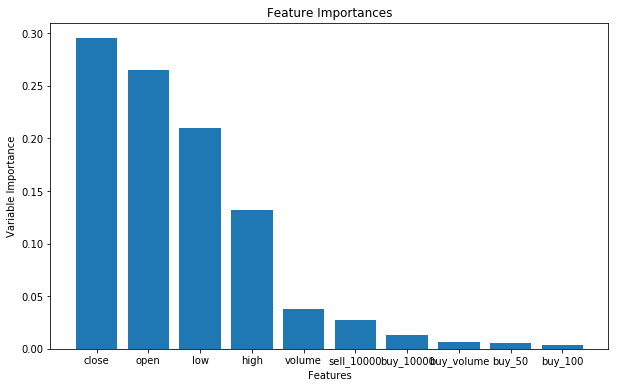

In [32]:
features = x.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(range(xTrain.shape[1])[:10], importances[indices[:10]])
plt.title('Feature Importances')
plt.xticks(range(xTrain.shape[1])[:10], [features[i] for i in indices])
ax.set_xlabel('Features')
ax.set_ylabel('Variable Importance')
plt.show()

In [33]:
import xgboost as xgb

In [34]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [35]:
model = xgb.XGBRegressor()

test_params = {
 'max_depth':[2,4,6]
}

model = GridSearchCV(estimator = model,param_grid = test_params, cv=5)
model.fit(xTrain, yTrain)
print(model.best_params_)
model.score(xTest, yTest)

{'max_depth': 6}


0.9998613790028889

In [36]:
model = xgb.XGBRegressor(max_depth=4)
model.fit(xTrain, yTrain)
model.score(xTest, yTest)

0.9998610602785571

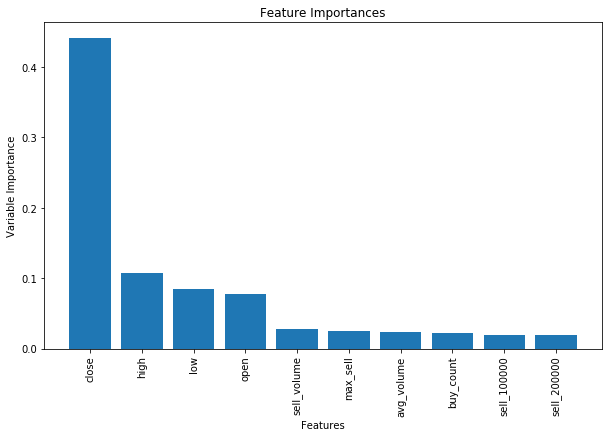

In [37]:
features = x.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(range(xTrain.shape[1])[:10], importances[indices[:10]])
plt.title('Feature Importances')
plt.xticks(range(xTrain.shape[1])[:10], [features[i] for i in indices], rotation='vertical')
ax.set_xlabel('Features')
ax.set_ylabel('Variable Importance')
plt.show()

In [38]:
x.head()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,8546.0,8544.0,8546.5,8543.5,2863215,1490030,1373185,200000.0,100400.0,398,...,160,142,113,95,19,4.0,0.0,201,504,4061.297872
2019-06-01 00:01:00,8544.5,8557.0,8563.0,8544.0,2058785,1479285,579500,189127.0,90000.0,198,...,464,388,252,181,33,1.0,0.0,712,263,2111.574359
2019-06-01 00:02:00,8556.5,8565.5,8567.5,8556.5,2468185,1224395,1243790,74000.0,214169.0,91,...,382,347,232,186,22,0.0,0.0,571,120,3571.903039
2019-06-01 00:03:00,8566.0,8562.5,8566.0,8557.5,931585,263639,667946,18521.0,111334.0,186,...,108,87,65,49,3,0.0,0.0,172,259,2161.450116
2019-06-01 00:04:00,8563.0,8556.5,8563.0,8556.5,797504,170871,626633,65835.0,121070.0,157,...,32,28,23,15,3,0.0,0.0,48,237,2798.259649


In [39]:
x.columns

Index(['open', 'close', 'high', 'low', 'volume', 'buy_volume', 'sell_volume',
       'max_buy', 'max_sell', 'sell_50', 'sell_100', 'sell_500', 'sell_1000',
       'sell_10000', 'sell_100000', 'sell_200000', 'buy_50', 'buy_100',
       'buy_500', 'buy_1000', 'buy_10000', 'buy_100000', 'buy_200000',
       'buy_count', 'sell_count', 'avg_volume'],
      dtype='object')

In [40]:
# x['sell_0-50'] = np.nan
# x['sell_50-100'] = np.nan
# x['sell_100-500'] = np.nan
# x['sell_500-1000'] = np.nan
# x['sell_1000-10000'] = np.nan
# x['sell_10000-100000'] = np.nan
# x['sell_100000-200000'] = np.nan

# x['buy_0-50'] = np.nan
# x['buy_50-100'] = np.nan
# x['buy_100-500'] = np.nan
# x['buy_500-1000'] = np.nan
# x['buy_1000-10000'] = np.nan
# x['buy_10000-100000'] = np.nan
# x['buy_100000-200000'] = np.nan

# x['trade_count'] = np.nan
# x['target'] = y.target

In [41]:
# x.buy_volume = x.buy_volume.astype(np.float64)
# x.sell_volume = x.sell_volume.astype(np.float64)
# x.buy_count = x.buy_count.astype(np.float64)
# x.sell_count = x.sell_count.astype(np.float64)

In [42]:
# for i, row in x.iterrows():
#     x.at[i, 'target'] = (x.loc[i, 'target']) / x.loc[i, 'close'] if x.loc[i, 'close'] != 0 else 0
#     x.at[i, 'close'] = (x.loc[i, 'close']) / x.loc[i, 'open'] if x.loc[i, 'open'] != 0 else 0
#     x.at[i, 'high'] = (x.loc[i, 'high']) / x.loc[i, 'open'] if x.loc[i, 'open'] != 0 else 0
#     x.at[i, 'low'] = (x.loc[i, 'low']) / x.loc[i, 'open'] if x.loc[i, 'open'] != 0 else 0
#     x.at[i, 'avg_volume'] = x.loc[i, 'avg_volume'] / x.loc[i, 'volume'] if x.loc[i, 'volume'] != 0 else 0
#     x.at[i, 'open'] = (x.loc[i, 'open']) / x.loc[i, 'open'] if x.loc[i, 'open'] != 0 else 0
#     x.at[i, 'max_buy'] = x.loc[i, 'max_buy'] / x.loc[i, 'buy_volume'] if x.loc[i, 'buy_volume'] != 0 else 0
#     x.at[i, 'max_sell'] = x.loc[i, 'max_sell'] / x.loc[i, 'sell_volume'] if x.loc[i, 'sell_volume'] != 0 else 0
#     x.at[i, 'buy_volume'] = (x.loc[i, 'buy_volume'] / x.loc[i, 'volume']) if x.loc[i, 'volume'] != 0 else 0
#     x.at[i, 'sell_volume'] = (x.loc[i, 'sell_volume'] / x.loc[i, 'volume']) if x.loc[i, 'volume'] != 0 else 0
    
#     total_count = (x.loc[i, 'buy_count'] + x.loc[i, 'sell_count'])
#     x.at[i, 'sell_0-50'] = (x.loc[i, 'sell_count'] - x.loc[i, 'sell_50']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_50-100'] = (x.loc[i, 'sell_50'] - x.loc[i, 'sell_100']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_100-500'] = (x.loc[i, 'sell_100'] - x.loc[i, 'sell_500']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_500-1000'] = (x.loc[i, 'sell_500'] - x.loc[i, 'sell_1000']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_1000-10000'] = (x.loc[i, 'sell_1000'] - x.loc[i, 'sell_10000']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_10000-100000'] = (x.loc[i, 'sell_10000'] - x.loc[i, 'sell_100000']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_100000-200000'] = (x.loc[i, 'sell_100000'] - x.loc[i, 'sell_200000']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_200000'] = (x.loc[i, 'sell_200000']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_count'] = x.loc[i, 'sell_count'] / total_count if total_count != 0 else 0
    
#     x.at[i, 'buy_0-50'] = (x.loc[i, 'buy_count'] - x.loc[i, 'buy_50']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_50-100'] = (x.loc[i, 'buy_50'] - x.loc[i, 'buy_100']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_100-500'] = (x.loc[i, 'buy_100'] - x.loc[i, 'buy_500']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_500-1000'] = (x.loc[i, 'buy_500'] - x.loc[i, 'buy_1000']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_1000-10000'] = (x.loc[i, 'buy_1000'] - x.loc[i, 'buy_10000']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_10000-100000'] = (x.loc[i, 'buy_10000'] - x.loc[i, 'buy_100000']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_100000-200000'] = (x.loc[i, 'buy_100000'] - x.loc[i, 'buy_200000']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_200000'] = (x.loc[i, 'buy_200000']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_count'] = x.loc[i, 'buy_count'] / total_count if total_count != 0 else 0

In [43]:
# y = pd.DataFrame(x.target)

In [44]:
# del x['trade_count']

# del x['sell_50']
# del x['sell_100']
# del x['sell_500']
# del x['sell_1000']
# del x['sell_10000']
# del x['sell_100000']

# del x['buy_50']
# del x['buy_100']
# del x['buy_500']
# del x['buy_1000']
# del x['buy_10000']
# del x['buy_100000']

# del x['volume']
# del x['target']

In [45]:
# x.columns

In [46]:
# y.head()

In [47]:
# from sklearn.preprocessing import normalize

In [48]:
# x = normalize(x)
# y = normalize(y)

In [49]:
# xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

In [50]:
# model = xgb.XGBRegressor()

# test_params = {
#  'max_depth':[2,4,6]
# }

# model = GridSearchCV(estimator = model,param_grid = test_params, cv=5)
# model.fit(xTrain, yTrain)
# print(model.best_params_)
# model.score(xTest, yTest)

In [51]:
# clf = RandomForestRegressor(max_depth=2, max_features=math.floor(math.sqrt(len(x.columns))), n_estimators=50)
# clf.fit(xTrain, yTrain)
# clf.score(xTest, yTest)

In [52]:
x.head()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,8546.0,8544.0,8546.5,8543.5,2863215,1490030,1373185,200000.0,100400.0,398,...,160,142,113,95,19,4.0,0.0,201,504,4061.297872
2019-06-01 00:01:00,8544.5,8557.0,8563.0,8544.0,2058785,1479285,579500,189127.0,90000.0,198,...,464,388,252,181,33,1.0,0.0,712,263,2111.574359
2019-06-01 00:02:00,8556.5,8565.5,8567.5,8556.5,2468185,1224395,1243790,74000.0,214169.0,91,...,382,347,232,186,22,0.0,0.0,571,120,3571.903039
2019-06-01 00:03:00,8566.0,8562.5,8566.0,8557.5,931585,263639,667946,18521.0,111334.0,186,...,108,87,65,49,3,0.0,0.0,172,259,2161.450116
2019-06-01 00:04:00,8563.0,8556.5,8563.0,8556.5,797504,170871,626633,65835.0,121070.0,157,...,32,28,23,15,3,0.0,0.0,48,237,2798.259649


In [53]:
x.dropna(axis=1,inplace=True)

In [54]:
x.head()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,8546.0,8544.0,8546.5,8543.5,2863215,1490030,1373185,200000.0,100400.0,398,...,160,142,113,95,19,4.0,0.0,201,504,4061.297872
2019-06-01 00:01:00,8544.5,8557.0,8563.0,8544.0,2058785,1479285,579500,189127.0,90000.0,198,...,464,388,252,181,33,1.0,0.0,712,263,2111.574359
2019-06-01 00:02:00,8556.5,8565.5,8567.5,8556.5,2468185,1224395,1243790,74000.0,214169.0,91,...,382,347,232,186,22,0.0,0.0,571,120,3571.903039
2019-06-01 00:03:00,8566.0,8562.5,8566.0,8557.5,931585,263639,667946,18521.0,111334.0,186,...,108,87,65,49,3,0.0,0.0,172,259,2161.450116
2019-06-01 00:04:00,8563.0,8556.5,8563.0,8556.5,797504,170871,626633,65835.0,121070.0,157,...,32,28,23,15,3,0.0,0.0,48,237,2798.259649


In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
y

,target
timestamp,
2019-06-01 00:00:00,8557.0
2019-06-01 00:01:00,8565.5
2019-06-01 00:02:00,8562.5
2019-06-01 00:03:00,8556.5
2019-06-01 00:04:00,8553.0
2019-06-01 00:05:00,8547.5
2019-06-01 00:06:00,8535.5
2019-06-01 00:07:00,8535.0
2019-06-01 00:08:00,8530.5


In [57]:
def convertToFloat(x, y):
    for column in x.columns:
        x[column] = x[column].astype(np.float64)
    for column in y.columns:
        y[column] = y[column].astype(np.float64)

In [58]:
convertToFloat(x,y)

In [59]:
scaler = StandardScaler()
transX = scaler.fit_transform(x)
transY = scaler.fit_transform(y)

In [60]:
xTrain, xTest, yTrain, yTest = train_test_split(transX, transY, test_size=0.2)

In [61]:
new_model = xgb.XGBRegressor()

test_params = {
 'max_depth':[2,4,6]
}

new_model = GridSearchCV(estimator = new_model,param_grid = test_params, cv=5)
new_model.fit(xTrain, yTrain)
print(new_model.best_params_)
new_model.score(xTest, yTest)

{'max_depth': 6}


0.9998379517095843

In [62]:
data_source = './original_data/test.csv'
df = pd.read_csv(data_source)

In [63]:
df.head()

,Unnamed: 0,timestamp,open,close,high,low,volume,buy_volume,sell_volume,max_buy,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
0,0,2019-08-01 00:00:00,10088.5,10108.0,10108.5,10088.5,5189557,3859798,1329759,466922.0,...,748,622,380,296,85.0,2.0,1.0,1053,297,3844.116296
1,1,2019-08-01 00:01:00,10107.5,10109.0,10120.0,10100.0,5792264,4627428,1164836,250962.0,...,890,778,471,357,99.0,6.0,1.0,1166,512,3451.885578
2,2,2019-08-01 00:02:00,10108.5,10093.0,10109.0,10088.5,4974185,1213736,3760449,100000.0,...,217,194,152,127,32.0,0.0,0.0,297,707,4954.367530
3,3,2019-08-01 00:03:00,10093.0,10111.5,10111.5,10093.0,1863787,1436924,426863,100000.0,...,346,298,188,146,36.0,0.0,0.0,559,88,2880.659969
4,4,2019-08-01 00:04:00,10111.0,10106.0,10120.5,10105.0,3785526,2517687,1267839,212011.0,...,393,334,211,164,55.0,4.0,1.0,579,450,3678.839650


In [64]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'open', 'close', 'high', 'low', 'volume',
       'buy_volume', 'sell_volume', 'max_buy', 'max_sell', 'sell_50',
       'sell_100', 'sell_500', 'sell_1000', 'sell_10000', 'sell_100000',
       'sell_200000', 'buy_50', 'buy_100', 'buy_500', 'buy_1000', 'buy_10000',
       'buy_100000', 'buy_200000', 'buy_count', 'sell_count', 'avg_volume'],
      dtype='object')

In [65]:
del df['Unnamed: 0']

In [66]:
df.head()

,timestamp,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
0,2019-08-01 00:00:00,10088.5,10108.0,10108.5,10088.5,5189557,3859798,1329759,466922.0,198900.0,...,748,622,380,296,85.0,2.0,1.0,1053,297,3844.116296
1,2019-08-01 00:01:00,10107.5,10109.0,10120.0,10100.0,5792264,4627428,1164836,250962.0,116009.0,...,890,778,471,357,99.0,6.0,1.0,1166,512,3451.885578
2,2019-08-01 00:02:00,10108.5,10093.0,10109.0,10088.5,4974185,1213736,3760449,100000.0,218000.0,...,217,194,152,127,32.0,0.0,0.0,297,707,4954.367530
3,2019-08-01 00:03:00,10093.0,10111.5,10111.5,10093.0,1863787,1436924,426863,100000.0,100000.0,...,346,298,188,146,36.0,0.0,0.0,559,88,2880.659969
4,2019-08-01 00:04:00,10111.0,10106.0,10120.5,10105.0,3785526,2517687,1267839,212011.0,187830.0,...,393,334,211,164,55.0,4.0,1.0,579,450,3678.839650


In [67]:
df.timestamp = pd.to_datetime(df.timestamp)

In [68]:
df.set_index('timestamp',inplace=True)

In [69]:
df.sort_index(inplace=True)

In [70]:
df.isna().any()

open           False
close          False
high           False
low            False
volume         False
buy_volume     False
sell_volume    False
max_buy         True
max_sell        True
sell_50        False
sell_100       False
sell_500       False
sell_1000      False
sell_10000      True
sell_100000     True
sell_200000     True
buy_50         False
buy_100        False
buy_500        False
buy_1000       False
buy_10000       True
buy_100000      True
buy_200000      True
buy_count      False
sell_count     False
avg_volume     False
dtype: bool

In [71]:
df.fillna(value=0, inplace=True)

In [72]:
for i, row in df.iterrows():
    try:
        df.at[i, 'target'] = df.loc[i+datetime.timedelta(minutes=1), 'close']
    except KeyError as e:
        pass

In [73]:
df.tail()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-08-31 23:55:00,9605.5,9603.0,9605.5,9602.5,444635,1329,443306,1000.0,137727.0,133,...,1,1,0,0.0,0.0,0.0,69,425,900.070850,9603.0
2019-08-31 23:56:00,9602.5,9603.0,9603.0,9602.5,87349,31054,56295,10000.0,25000.0,14,...,10,9,6,0.0,0.0,0.0,76,19,919.463158,9603.0
2019-08-31 23:57:00,9603.0,9603.0,9603.0,9602.5,363048,263903,99145,68902.0,36216.0,25,...,36,30,25,5.0,0.0,0.0,116,40,2327.230769,9603.0
2019-08-31 23:58:00,9602.5,9603.0,9603.0,9602.5,151053,97864,53189,35360.0,30000.0,4,...,22,19,10,2.0,0.0,0.0,70,9,1912.063291,9602.5
2019-08-31 23:59:00,9603.0,9602.5,9603.0,9602.5,320935,300921,20014,67619.0,10000.0,11,...,38,32,27,6.0,0.0,0.0,75,66,2276.134752,NaN


In [74]:
df.drop(df.index[-1],inplace=True)
y = df.target
del df['target']
x = df.copy()
y = pd.DataFrame(y)

In [75]:
y.head()

,target
timestamp,
2019-08-01 00:00:00,10109.0
2019-08-01 00:01:00,10093.0
2019-08-01 00:02:00,10111.5
2019-08-01 00:03:00,10106.0
2019-08-01 00:04:00,10112.5


In [76]:
convertToFloat(x,y)

In [77]:
scaler = StandardScaler()
transXTestData = scaler.fit_transform(x)
transYTestData = scaler.fit_transform(y)

In [78]:
xTrain_t, xTest_t, yTrain_t, yTest_t = train_test_split(transXTestData, transYTestData, test_size=0.2)

In [79]:
new_model.score(xTrain_t, yTrain_t)

0.9905112065630044

In [80]:
new_model = xgb.XGBRegressor(max_depth=4)
new_model.fit(xTrain, yTrain)
new_model.score(xTest, yTest)

0.9998384366858054

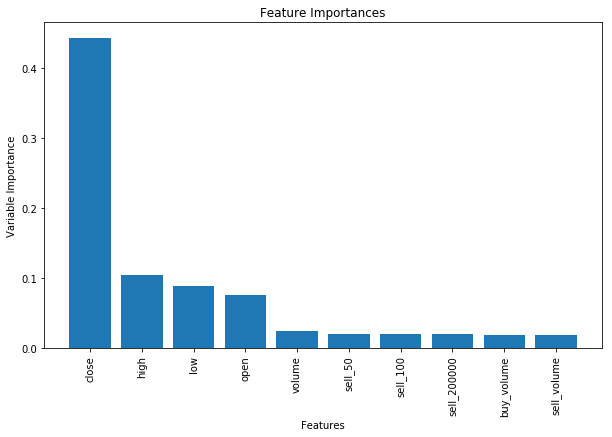

In [81]:
features = x.columns
importances = new_model.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(range(xTrain.shape[1])[:10], importances[indices[:10]])
plt.title('Feature Importances')
plt.xticks(range(xTrain.shape[1])[:10], [features[i] for i in indices], rotation='vertical')
ax.set_xlabel('Features')
ax.set_ylabel('Variable Importance')
plt.show()

# Classification

In [82]:
y.head()

,target
timestamp,
2019-08-01 00:00:00,10109.0
2019-08-01 00:01:00,10093.0
2019-08-01 00:02:00,10111.5
2019-08-01 00:03:00,10106.0
2019-08-01 00:04:00,10112.5


In [83]:
for i, row in x.iterrows():
    if y.loc[i,'target'] <= x.loc[i,'close']:
        y.at[i,'target'] = -1
    else:
        y.at[i,'target'] = 1

In [84]:
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44639 entries, 2019-08-01 00:00:00 to 2019-08-31 23:58:00
Data columns (total 1 columns):
target    44639 non-null float64
dtypes: float64(1)
memory usage: 1.9 MB


In [85]:
y['target'] = y['target'].astype(np.int64)

In [86]:
y.head()

,target
timestamp,
2019-08-01 00:00:00,1
2019-08-01 00:01:00,-1
2019-08-01 00:02:00,1
2019-08-01 00:03:00,-1
2019-08-01 00:04:00,1


In [87]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [89]:
clf = RandomForestClassifier()

test_params = {
 'max_depth':[2,4,6],
 'n_estimators':[10,100]
}

clf = GridSearchCV(estimator = clf,param_grid = test_params, cv=5)
clf.fit(xTrain, yTrain.values.ravel())
print(clf.best_params_)

{'max_depth': 4, 'n_estimators': 10}


In [90]:
clf = RandomForestClassifier(max_depth=4, n_estimators=100)
clf.fit(xTrain, yTrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler

In [92]:
y_pred = clf.predict(xTrain)

In [93]:
print(f1_score(yTrain, y_pred))
print(confusion_matrix(yTrain, y_pred))

0.3461158509205209
[[17295  2973]
 [11589  3854]]


In [94]:
scaler = StandardScaler()
transXTrain = scaler.fit_transform(xTrain)

In [95]:
len(xTrain)

35711

In [96]:
clf = RandomForestClassifier()

test_params = {
 'max_depth':[2,4,6],
 'n_estimators':[10,100]
}

clf = GridSearchCV(estimator = clf,param_grid = test_params, cv=5)
clf.fit(transXTrain, yTrain.values.ravel())
print(clf.best_params_)

{'max_depth': 6, 'n_estimators': 10}


In [97]:
clf = RandomForestClassifier(max_depth=6, n_estimators=100)
clf.fit(transXTrain, yTrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
y_pred = clf.predict(transXTrain)
print(f1_score(yTrain, y_pred))
print(balanced_accuracy_score(yTrain, y_pred))
print(accuracy_score(yTrain, y_pred))
print(confusion_matrix(yTrain, y_pred))

0.38871199895319924
0.569573452957591
0.6075438940382515
[[17240  3028]
 [10987  4456]]


In [99]:
transXTest = scaler.fit_transform(xTest)

In [100]:
y_pred = clf.predict(transXTest)
print(balanced_accuracy_score(yTest, y_pred))
print(confusion_matrix(yTest, y_pred))

0.5539385783198794
[[4051  991]
 [2703 1183]]


In [101]:
np.random.seed(1)
benchmark = np.random.randint(low=0,high=2,size=len(transXTest))

In [102]:
benchmark = [-1 if x == 0 else 1 for x in benchmark]

In [103]:
accuracy_score(yTest, benchmark)

0.49731182795698925

Our randomforest model performs worse at classifying whether or not the next tick will be higher/lower from where we are currently than a random guess. :(

In [104]:
import xgboost as xgb

In [105]:
new_model = xgb.XGBClassifier()

test_params = {
 'max_depth':[2,4,6]
}

new_model = GridSearchCV(estimator = new_model,param_grid = test_params, cv=5)
new_model.fit(transXTrain, yTrain.values.ravel())
print(new_model.best_params_)

{'max_depth': 2}


In [106]:
new_model = xgb.XGBClassifier(max_depth=2)
new_model.fit(transXTrain, yTrain.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [107]:
y_pred = new_model.predict(transXTest)
print(f1_score(yTest, y_pred))
print(balanced_accuracy_score(yTest, y_pred))
print(accuracy_score(yTest, y_pred))
print(confusion_matrix(yTest, y_pred))

0.4212173368799875
0.5582512453802878
0.5856854838709677
[[3883 1159]
 [2540 1346]]


Bechmark Scores:

In [108]:
print(f1_score(yTest, benchmark))
print(accuracy_score(yTest, benchmark))
print(balanced_accuracy_score(yTest, benchmark))
print(confusion_matrix(yTest, benchmark))

0.4612244897959184
0.49731182795698925
0.4969709917904221
[[2519 2523]
 [1965 1921]]


I've found that we can consistenly get above 50% (~56%) predictive power from the xgboostclassifier model (about the same as with randomforest) on the negative class (predicting that the next tick will be below where we are currently). We lack in predictive power ~45% on the positive class (predicting that the next tick will be above where we currently are, and that is what brings down our total f1_score). We need to figure out how to get the positive class prediction power above 50%.

In [109]:
probabilities = pd.DataFrame(new_model.predict_proba(transXTest))
probabilities.describe()

,0,1
count,8928.000000,8928.000000
mean,0.541057,0.458943
std,0.101462,0.101462
min,0.228802,0.222900
25%,0.493226,0.402296
50%,0.546026,0.453974
75%,0.597704,0.506774
max,0.777100,0.771198


In [110]:
probabilities.columns = ['prob_below', 'prob_above']

In [111]:
# 50 and 75 percentile thresholds for the probability
fifty_above = np.percentile(probabilities['prob_above'],50)
seventyfive_above = np.percentile(probabilities['prob_above'],75)
fifty_below = np.percentile(probabilities['prob_below'],50)
seventyfive_below = np.percentile(probabilities['prob_below'],75)

# probabilities.loc[probabilities[1] > seventyfive, 1].median()

In [112]:
probabilities.head()

,prob_below,prob_above
0,0.602590,0.397410
1,0.485386,0.514614
2,0.559065,0.440935
3,0.577572,0.422428
4,0.404286,0.595714


In [113]:
results = probabilities.copy()
results['prediction'] = new_model.predict(transXTest)
results['actual'] = yTest['target'].reset_index(drop=True)
results.head()

,prob_below,prob_above,prediction,actual
0,0.602590,0.397410,-1,1
1,0.485386,0.514614,1,-1
2,0.559065,0.440935,-1,1
3,0.577572,0.422428,-1,1
4,0.404286,0.595714,1,-1


In [114]:
fifty_above_results = results.loc[results.prob_above > fifty_above, ['prediction','actual']].copy()
seventyfive_above_results = results.loc[results.prob_above > seventyfive_above, ['prediction','actual']].copy()
print('-- balanced_accuracy_score only longing values with probability above median probability for pos class --')
print(balanced_accuracy_score(fifty_above_results['actual'], fifty_above_results['prediction']))
print('')
print('-- balanced_accuracy_score only longing values with probability above 75 percentile probability for pos class --')
print(balanced_accuracy_score(seventyfive_above_results['actual'], seventyfive_above_results['prediction']))

-- balanced_accuracy_score only longing values with probability above median probability for pos class --
0.5383723955301359

-- balanced_accuracy_score only longing values with probability above 75 percentile probability for pos class --
0.5


In [115]:
confusion_matrix(fifty_above_results['actual'], fifty_above_results['prediction'])

array([[1059, 1159],
       [ 900, 1346]])

In [116]:
print(confusion_matrix(seventyfive_above_results['actual'], seventyfive_above_results['prediction']))
print(accuracy_score(seventyfive_above_results['actual'], seventyfive_above_results['prediction']))

[[   0 1034]
 [   0 1197]]
0.5365307037203048


In [117]:
below_results = results.loc[results.prob_below > 0.5, :]
above_results = results.loc[results.prob_above > 0.5, :]

In [118]:
below_results.describe()

,prob_below,prob_above,prediction,actual
count,6423.000000,6423.000000,6423.0,6423.000000
mean,0.588556,0.411444,-1.0,-0.209092
std,0.066692,0.066692,0.0,0.977972
min,0.500019,0.222900,-1.0,-1.000000
25%,0.539199,0.366332,-1.0,-1.000000
50%,0.564704,0.435296,-1.0,-1.000000
75%,0.633668,0.460801,-1.0,1.000000
max,0.777100,0.499981,-1.0,1.000000


## < 25 Percentile Bucket Shorts

Accuracy_score makes more sense to use below than f1_score because we're only looking at one class

In [119]:
print(below_results.loc[below_results.prob_below < 0.515843,'actual'].count())
print(confusion_matrix(below_results.loc[below_results.prob_below < 0.515843,'actual'], below_results.loc[below_results.prob_below < 0.515843,'prediction']))
print(accuracy_score(below_results.loc[below_results.prob_below < 0.515843,'actual'], below_results.loc[below_results.prob_below < 0.515843,'prediction']))

548
[[271   0]
 [277   0]]
0.49452554744525545


As you can see, the above bucket of shorts gets more wrong than it gets right ~48.1%

## 25 to 50 Percentile Bucket Shorts

In [120]:
print(below_results.loc[(below_results.prob_below >= 0.515843) & (below_results.prob_below < 0.536436),'actual'].count())
print(confusion_matrix(below_results.loc[(below_results.prob_below >= 0.515843) & (below_results.prob_below < 0.536436),'actual'], below_results.loc[(below_results.prob_below >= 0.515843) & (below_results.prob_below < 0.536436),'prediction']))
print(accuracy_score(below_results.loc[(below_results.prob_below >= 0.515843) & (below_results.prob_below < 0.536436),'actual'], below_results.loc[(below_results.prob_below >= 0.515843) & (below_results.prob_below < 0.536436),'prediction']))

945
[[537   0]
 [408   0]]
0.5682539682539682


## 50 to 75 Percentile Bucket Shorts

In [121]:
print(below_results.loc[(below_results.prob_below >= 0.536436) & (below_results.prob_below < 0.622083),'actual'].count())
print(confusion_matrix(below_results.loc[(below_results.prob_below >= 0.536436) & (below_results.prob_below < 0.622083),'actual'], below_results.loc[(below_results.prob_below >= 0.536436) & (below_results.prob_below < 0.622083),'prediction']))
print(accuracy_score(below_results.loc[(below_results.prob_below >= 0.536436) & (below_results.prob_below < 0.622083),'actual'], below_results.loc[(below_results.prob_below >= 0.536436) & (below_results.prob_below < 0.622083),'prediction']))

3156
[[1819    0]
 [1337    0]]
0.576362484157161


## > 75 Percentile Bucket Shorts

In [122]:
print(below_results.loc[(below_results.prob_below >= 0.622083),'actual'].count())
print(confusion_matrix(below_results.loc[(below_results.prob_below >= 0.622083),'actual'], below_results.loc[(below_results.prob_below >= 0.622083),'prediction']))
print(accuracy_score(below_results.loc[(below_results.prob_below >= 0.622083),'actual'], below_results.loc[(below_results.prob_below >= 0.622083),'prediction']))

1774
[[1256    0]
 [ 518    0]]
0.7080045095828635


In [123]:
below_results.describe()

,prob_below,prob_above,prediction,actual
count,6423.000000,6423.000000,6423.0,6423.000000
mean,0.588556,0.411444,-1.0,-0.209092
std,0.066692,0.066692,0.0,0.977972
min,0.500019,0.222900,-1.0,-1.000000
25%,0.539199,0.366332,-1.0,-1.000000
50%,0.564704,0.435296,-1.0,-1.000000
75%,0.633668,0.460801,-1.0,1.000000
max,0.777100,0.499981,-1.0,1.000000


## ALL Shorts

In [124]:
print(below_results.loc[:,'actual'].count())
print(confusion_matrix(below_results.loc[:,'actual'], below_results.loc[:,'prediction']))
print(accuracy_score(below_results.loc[:,'actual'], below_results.loc[:,'prediction']))

6423
[[3883    0]
 [2540    0]]
0.6045461622294878


## > 25 Percentile Shorts

In [125]:
percentile = np.percentile(below_results.loc[:,'prob_below'],25)
print(below_results.loc[below_results.prob_below > percentile,'actual'].count())
print(confusion_matrix(below_results.loc[below_results.prob_below > percentile,'actual'], below_results.loc[below_results.prob_below > percentile,'prediction']))
print(accuracy_score(below_results.loc[below_results.prob_below > percentile,'actual'], below_results.loc[below_results.prob_below > percentile,'prediction']))

4816
[[3016    0]
 [1800    0]]
0.6262458471760798


## > 50 Percentile Shorts

In [126]:
percentile = np.percentile(below_results.loc[:,'prob_below'],50)
print(below_results.loc[below_results.prob_below > percentile,'actual'].count())
print(confusion_matrix(below_results.loc[below_results.prob_below > percentile,'actual'], below_results.loc[below_results.prob_below > percentile,'prediction']))
print(accuracy_score(below_results.loc[below_results.prob_below > percentile,'actual'], below_results.loc[below_results.prob_below > percentile,'prediction']))

3211
[[2119    0]
 [1092    0]]
0.659919028340081


## > 75 Percentile Shorts

In [127]:
percentile = np.percentile(below_results.loc[:,'prob_below'],75)
print(below_results.loc[below_results.prob_below > percentile,'actual'].count())
print(confusion_matrix(below_results.loc[below_results.prob_below > percentile,'actual'], below_results.loc[below_results.prob_below > percentile,'prediction']))
print(accuracy_score(below_results.loc[below_results.prob_below > percentile,'actual'], below_results.loc[below_results.prob_below > percentile,'prediction']))

1606
[[1135    0]
 [ 471    0]]
0.7067247820672479


As expected, the predictions with higher probability have higher accuracy_scores. This means that a higher percentage of them are correctly classified. We don't want to just trade the ones with higher probabilities though because the number of trades would drastically decrease, but I wonder if a good strategy might be to lever up on the ones with higher probabilities.

## < 25 Percentile Bucket Longs

In [128]:
above_results.head()

,prob_below,prob_above,prediction,actual
1,0.485386,0.514614,1,-1
4,0.404286,0.595714,1,-1
5,0.456687,0.543313,1,1
10,0.469116,0.530884,1,1
13,0.411343,0.588657,1,-1


In [129]:
print(above_results.loc[above_results.prob_above < np.percentile(above_results.loc[:,'prob_above'],25),'actual'].count())
print(confusion_matrix(above_results.loc[above_results.prob_above < np.percentile(above_results.loc[:,'prob_above'],25), 'actual'], above_results.loc[above_results.prob_above < np.percentile(above_results.loc[:,'prob_above'],25),'prediction']))
print(accuracy_score(above_results.loc[above_results.prob_above < np.percentile(above_results.loc[:,'prob_above'],25),'actual'], above_results.loc[above_results.prob_above < np.percentile(above_results.loc[:,'prob_above'],25),'prediction']))

626
[[  0 282]
 [  0 344]]
0.549520766773163


## 25 Percentile to 50 Percentile

In [130]:
print(above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,25)) & (above_results.prob_above < np.percentile(above_results.prob_above,50)),'actual'].count())
print(confusion_matrix(above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,25)) & (above_results.prob_above < np.percentile(above_results.prob_above,50)),'actual'], above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,25)) & (above_results.prob_above < np.percentile(above_results.prob_above,50)),'prediction']))
print(accuracy_score(above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,25)) & (above_results.prob_above < np.percentile(above_results.prob_above,50)),'actual'], above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,25)) & (above_results.prob_above < np.percentile(above_results.prob_above,50)),'prediction']))

623
[[  0 299]
 [  0 324]]
0.5200642054574639


This is interesting, the percentage of correctly labeled longs for longs with probabilities between the 25 and 50 percentiles is lower than that of longs with probabilities < the 25 percentile.

## 50 Percentile to 75 Percentile

In [131]:
print(above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,50)) & (above_results.prob_above < np.percentile(above_results.prob_above,75)),'actual'].count())
print(confusion_matrix(above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,50)) & (above_results.prob_above < np.percentile(above_results.prob_above,75)),'actual'], above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,50)) & (above_results.prob_above < np.percentile(above_results.prob_above,75)),'prediction']))
print(accuracy_score(above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,50)) & (above_results.prob_above < np.percentile(above_results.prob_above,75)),'actual'], above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,50)) & (above_results.prob_above < np.percentile(above_results.prob_above,75)),'prediction']))

629
[[  0 291]
 [  0 338]]
0.5373608903020668


## > 75 Percentile

In [132]:
print(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],75),'actual'].count())
print(confusion_matrix(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],75), 'actual'], above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],75),'prediction']))
print(accuracy_score(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],75),'actual'], above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],75),'prediction']))

626
[[  0 287]
 [  0 339]]
0.5415335463258786


It's interesting that the model predicts shorts with higher accuracy than it does longs, but that could be because the sample on which we trained the model had many fewer longs to learn from than the shorts

## ALL LONGS

In [133]:
print(above_results.loc[:,'actual'].count())
print(confusion_matrix(above_results.loc[:, 'actual'], above_results.loc[:,'prediction']))
print(accuracy_score(above_results.loc[:,'actual'], above_results.loc[:,'prediction']))

2505
[[   0 1159]
 [   0 1346]]
0.5373253493013972


## > 25 Percentile Longs

In [134]:
print(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],25),'actual'].count())
print(confusion_matrix(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],25), 'actual'], above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],25),'prediction']))
print(accuracy_score(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],25),'actual'], above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],25),'prediction']))

1876
[[   0  875]
 [   0 1001]]
0.5335820895522388


## > 50 Percentile Longs

In [135]:
print(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],50),'actual'].count())
print(confusion_matrix(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],50), 'actual'], above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],50),'prediction']))
print(accuracy_score(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],50),'actual'], above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],50),'prediction']))

1252
[[  0 578]
 [  0 674]]
0.5383386581469649


In [136]:
y_future = dict()

In [137]:
import multiprocessing as mp

In [138]:
def asyncFunction(x, minutesAhead):
    x['target'] = 0
    x['target'] = x['target'].astype(np.int64)
    
    for j, row in x.iterrows():
        try:
            if x.loc[j+datetime.timedelta(minutes=minutesAhead), 'close'] <= x.loc[j, 'close']:
                x.at[j, 'target'] = -1
            else:
                x.at[j, 'target'] = 1
        except KeyError as e:
            pass
        
    return dict({minutesAhead: pd.DataFrame(x.target)})

In [139]:
pool = mp.Pool(processes=mp.cpu_count())
results = [pool.apply_async(asyncFunction, args=(x.copy(), test,)) for test in range(1,11)]
optimized_returns = [y_future.update(p.get()) for p in results]

Process ForkPoolWorker-4:
Process ForkPoolWorker-2:
Process ForkPoolWorker-3:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  

In [140]:
import sys

In [141]:
def plotFunction(x, minutesAhead, metric):
    values = np.zeros(10)
    
    for i in range(10):
        xTrain, xTest, yTrain, yTest = train_test_split(x.drop(y_future[minutesAhead].index[y_future[minutesAhead]['target'] == 0]), y_future[minutesAhead].drop(y_future[minutesAhead].index[y_future[minutesAhead]['target'] == 0]), test_size=0.2)
        xTrain = scaler.fit_transform(xTrain)
        xTest = scaler.fit_transform(xTest)
        new_model = xgb.XGBClassifier(max_depth=2)
        new_model.fit(xTrain, yTrain.values.ravel())
        y_pred = new_model.predict(xTest)
        
        if metric == 'f1':
            values[i - 1] = f1_score(yTest, y_pred)
        elif metric == 'accuracy':
            values[i - 1] = balanced_accuracy_score(yTest, y_pred)
    return dict({minutesAhead: values.mean()})

In [142]:
plot_values_dict = dict()
plot_values = list()

pool = mp.Pool(processes=mp.cpu_count())
results = [pool.apply_async(plotFunction, args=(x.copy(), test, 'f1')) for test in range(1,11)]
optimized_returns = [plot_values_dict.update(p.get()) for p in results]

Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Process ForkPoolWorker-6:
Process ForkPoolWorker-5:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  

In [143]:
for i in sorted(plot_values_dict.keys()):
    plot_values.append(plot_values_dict[i])

Text(0.5, 1.0, 'f1 score of model vs how far in the future we predict the price movement')

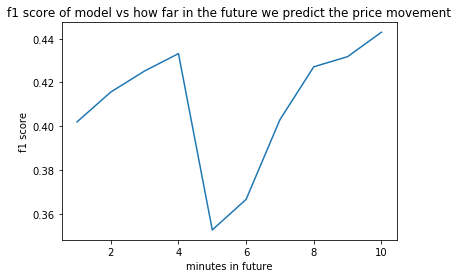

In [144]:
plt.plot([x for x in range(1,11)],plot_values)
plt.xlabel('minutes in future')
plt.ylabel('f1 score')
plt.title('f1 score of model vs how far in the future we predict the price movement')

In [145]:
accuracy_values_dict = dict()
accuracy_values = list()

pool = mp.Pool(processes=mp.cpu_count())
results = [pool.apply_async(plotFunction, args=(x.copy(), test, 'accuracy')) for test in range(1,11)]
optimized_returns = [accuracy_values_dict.update(p.get()) for p in results]

Process ForkPoolWorker-9:
Process ForkPoolWorker-11:
Process ForkPoolWorker-10:
Process ForkPoolWorker-12:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/envs/ikigai-ml/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)

In [146]:
for i in sorted(accuracy_values_dict.keys()):
    accuracy_values.append(accuracy_values_dict[i])

(0.45, 0.6)

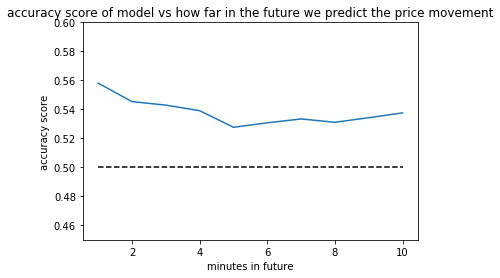

In [147]:
# need to look for changes above 0.15% per trade to make money - look into that
plt.plot([x for x in range(1,11)],accuracy_values)
plt.xlabel('minutes in future')
plt.ylabel('accuracy score')
plt.title('accuracy score of model vs how far in the future we predict the price movement')
plt.hlines(0.5, 1, 10, label='benchmark', linestyles='--')
plt.ylim(0.45, 0.60)

This makes more sense. The farther we look ahead in the future, the lower our accuracy goes. For some reason the f1 score goes up (need to look up the difference between f1 and accuracy because I thought f1 just made sure to remove class imbalance when looking at a model's performance)

# Add Technical Indicators as Features

In [148]:
import talib

In [149]:
talib.EMA(np.array(x.close), timeperiod=3)

array([           nan,            nan, 10103.33333333, ...,
        9603.80095119,  9603.4004756 ,  9603.2002378 ])

In [150]:
talib.TEMA(np.array(x.close), timeperiod=3)

array([          nan,           nan,           nan, ..., 9602.66001127,
       9602.77270295, 9602.90775958])

In [151]:
talib.RSI(np.array(x.close), timeperiod=3)

array([       nan,        nan,        nan, ..., 18.7737369, 18.7737369,
       18.7737369])

In [152]:
talib.STOCHRSI(np.array(x.close), timeperiod=3)

(array([nan, nan, nan, ...,  0.,  0.,  0.]),
 array([            nan,             nan,             nan, ...,
        -1.65793305e-14, -1.65793305e-14, -1.65793305e-14]))

In [153]:
macd, two, three = talib.MACD(np.array(x.close), fastperiod=12, slowperiod=26)

In [154]:
macd[33]

-14.539301268494455

In [155]:
talib.ROC(talib.RSI(np.array(x.close), timeperiod=3), timeperiod=3)

array([         nan,          nan,          nan, ..., -53.68060042,
       -35.78706695,   0.        ])

In [156]:
talib.ROC(talib.EMA(np.array(x.close), timeperiod=3), timeperiod=3)

array([        nan,         nan,         nan, ..., -0.03754039,
       -0.02918249, -0.01459368])

In [157]:
talib.ROC(talib.TEMA(np.array(x.close), timeperiod=3), timeperiod=3)

array([        nan,         nan,         nan, ..., -0.04145072,
       -0.02276989, -0.00043684])

In [158]:
taX = x.copy()

In [159]:
taX.head()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,10088.5,10108.0,10108.5,10088.5,5189557.0,3859798.0,1329759.0,466922.0,198900.0,201.0,...,748.0,622.0,380.0,296.0,85.0,2.0,1.0,1053.0,297.0,3844.116296
2019-08-01 00:01:00,10107.5,10109.0,10120.0,10100.0,5792264.0,4627428.0,1164836.0,250962.0,116009.0,349.0,...,890.0,778.0,471.0,357.0,99.0,6.0,1.0,1166.0,512.0,3451.885578
2019-08-01 00:02:00,10108.5,10093.0,10109.0,10088.5,4974185.0,1213736.0,3760449.0,100000.0,218000.0,489.0,...,217.0,194.0,152.0,127.0,32.0,0.0,0.0,297.0,707.0,4954.367530
2019-08-01 00:03:00,10093.0,10111.5,10111.5,10093.0,1863787.0,1436924.0,426863.0,100000.0,100000.0,79.0,...,346.0,298.0,188.0,146.0,36.0,0.0,0.0,559.0,88.0,2880.659969
2019-08-01 00:04:00,10111.0,10106.0,10120.5,10105.0,3785526.0,2517687.0,1267839.0,212011.0,187830.0,303.0,...,393.0,334.0,211.0,164.0,55.0,4.0,1.0,579.0,450.0,3678.839650


In [160]:
ema = pd.DataFrame(talib.EMA(np.array(x.close), timeperiod=3))
tema = pd.DataFrame(talib.TEMA(np.array(x.close), timeperiod=3))
rsi = pd.DataFrame(talib.RSI(np.array(x.close), timeperiod=3))
rocrsi = pd.DataFrame(talib.ROC(talib.RSI(np.array(x.close), timeperiod=3), timeperiod=3))
rocema = pd.DataFrame(talib.ROC(talib.EMA(np.array(x.close), timeperiod=3), timeperiod=3))
roctema = pd.DataFrame(talib.ROC(talib.TEMA(np.array(x.close), timeperiod=3), timeperiod=3))

In [161]:
taX['ema'] = ema.shift(periods=1).values
taX['tema'] = tema.shift(periods=1).values
taX['rsi'] = rsi.shift(periods=1).values
taX['rocrsi'] = rocrsi.shift(periods=1).values
taX['rocema'] = rocema.shift(periods=1).values
taX['roctema'] = roctema.shift(periods=1).values
taX['macd'] = pd.DataFrame(macd).shift(periods=1).values

In [162]:
taX.tail()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_count,sell_count,avg_volume,ema,tema,rsi,rocrsi,rocema,roctema,macd
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-08-31 23:54:00,9606.0,9605.0,9606.5,9605.0,223480.0,3021.0,220459.0,3000.0,80000.0,67.0,...,22.0,129.0,1480.000000,9607.407610,9606.642034,40.531045,-57.230747,0.001527,-0.038778,-1.881639
2019-08-31 23:55:00,9605.5,9603.0,9605.5,9602.5,444635.0,1329.0,443306.0,1000.0,137727.0,133.0,...,69.0,425.0,900.070850,9606.203805,9604.959742,29.236691,-69.148799,-0.030457,-0.068788,-1.893203
2019-08-31 23:56:00,9602.5,9603.0,9603.0,9602.5,87349.0,31054.0,56295.0,10000.0,25000.0,14.0,...,76.0,19.0,919.463158,9604.601902,9602.949709,18.773737,-61.633282,-0.038647,-0.057067,-2.040233
2019-08-31 23:57:00,9603.0,9603.0,9603.0,9602.5,363048.0,263903.0,99145.0,68902.0,36216.0,25.0,...,116.0,40.0,2327.230769,9603.800951,9602.660011,18.773737,-53.680600,-0.037540,-0.041451,-2.132176
2019-08-31 23:58:00,9602.5,9603.0,9603.0,9602.5,151053.0,97864.0,53189.0,35360.0,30000.0,4.0,...,70.0,9.0,1912.063291,9603.400476,9602.772703,18.773737,-35.787067,-0.029182,-0.022770,-2.179913


In [163]:
taX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44639 entries, 2019-08-01 00:00:00 to 2019-08-31 23:58:00
Data columns (total 33 columns):
open           44639 non-null float64
close          44639 non-null float64
high           44639 non-null float64
low            44639 non-null float64
volume         44639 non-null float64
buy_volume     44639 non-null float64
sell_volume    44639 non-null float64
max_buy        44639 non-null float64
max_sell       44639 non-null float64
sell_50        44639 non-null float64
sell_100       44639 non-null float64
sell_500       44639 non-null float64
sell_1000      44639 non-null float64
sell_10000     44639 non-null float64
sell_100000    44639 non-null float64
sell_200000    44639 non-null float64
buy_50         44639 non-null float64
buy_100        44639 non-null float64
buy_500        44639 non-null float64
buy_1000       44639 non-null float64
buy_10000      44639 non-null float64
buy_100000     44639 non-null float64
buy_200000     44639

In [164]:
taX.dropna(axis='rows',inplace=True)

In [165]:
y = y.loc[taX.index]

In [166]:
taX.sort_index(inplace=True)
y.sort_index(inplace=True)

In [167]:
xTrain, xTest, yTrain, yTest = train_test_split(taX, y, test_size=0.2)

In [168]:
scaler = StandardScaler()

xTrain = scaler.fit_transform(xTrain)
xTest = scaler.fit_transform(xTest)

In [169]:
clf = RandomForestClassifier()

test_params = {
 'max_depth':[2,4,6],
 'n_estimators':[10,20,30,40,50]
}

clf = GridSearchCV(estimator = clf,param_grid = test_params, cv=5)
clf.fit(xTrain, yTrain.values.ravel())
print(clf.best_params_)

{'max_depth': 6, 'n_estimators': 40}


In [173]:
clf = RandomForestClassifier(max_depth=6, n_estimators=40)
clf.fit(xTrain, yTrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [174]:
y_pred = clf.predict(xTest)
print(balanced_accuracy_score(yTest, y_pred))

0.5627769780263159


In [175]:
new_model = xgb.XGBClassifier()

test_params = {
 'max_depth':[2,4,6]
}

new_model = GridSearchCV(estimator = new_model,param_grid = test_params, cv=5)
new_model.fit(xTrain, yTrain.values.ravel())
print(new_model.best_params_)

{'max_depth': 4}


In [176]:
new_model = xgb.XGBClassifier(max_depth=4)
new_model.fit(xTrain, yTrain.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [177]:
y_pred = new_model.predict(xTest)
print(balanced_accuracy_score(yTest, y_pred))

0.5583262073427437


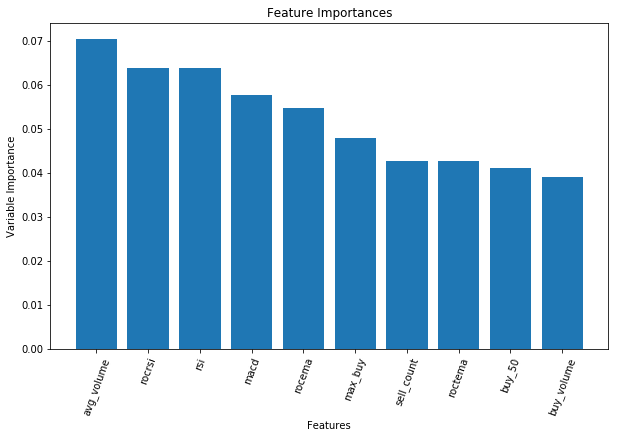

In [178]:
features = taX.columns
importances = new_model.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(range(xTrain.shape[1])[:10], importances[indices[:10]])
plt.title('Feature Importances')
plt.xticks(range(xTrain.shape[1])[:10], [features[i] for i in indices], rotation=70)
ax.set_xlabel('Features')
ax.set_ylabel('Variable Importance')
plt.show()
# bitmexorderbookspread folder for new features

In [180]:
pool = mp.Pool(processes=mp.cpu_count())
results = [pool.apply_async(asyncFunction, args=(taX.copy(), test,)) for test in range(1,11)]
optimized_returns = [y_future.update(p.get()) for p in results]

In [181]:
accuracy_values_dict = dict()
accuracy_values = list()

pool = mp.Pool(processes=mp.cpu_count())
results = [pool.apply_async(plotFunction, args=(taX.copy(), test, 'f1')) for test in range(1,11)]
optimized_returns = [accuracy_values_dict.update(p.get()) for p in results]

In [187]:
for i in sorted(accuracy_values_dict.keys()):
    accuracy_values.append(accuracy_values_dict[i])

Text(0.5, 1.0, 'f1 score of model vs how far in the future we predict the price movement')

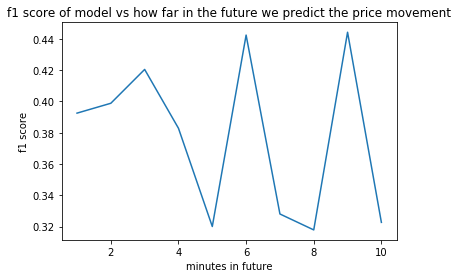

In [189]:
plt.plot([x for x in range(1,11)], accuracy_values)
plt.xlabel('minutes in future')
plt.ylabel('f1 score')
plt.title('f1 score of model vs how far in the future we predict the price movement')

This is very interesting...you can very easily see that we get big spikes in the f1 score on minutes ahead we look that are multiples of 3, because many of our technical indicators are set to calculate on 3. I wonder what we could do with this interesting property.

In [190]:
accuracy_values_dict = dict()
accuracy_values = list()

pool = mp.Pool(processes=mp.cpu_count())
results = [pool.apply_async(plotFunction, args=(taX.copy(), test, 'accuracy')) for test in range(1,11)]
optimized_returns = [accuracy_values_dict.update(p.get()) for p in results]

In [192]:
for i in sorted(accuracy_values_dict.keys()):
    accuracy_values.append(accuracy_values_dict[i])

Text(0.5, 1.0, 'accuracy score of model vs how far in the future we predict the price movement')

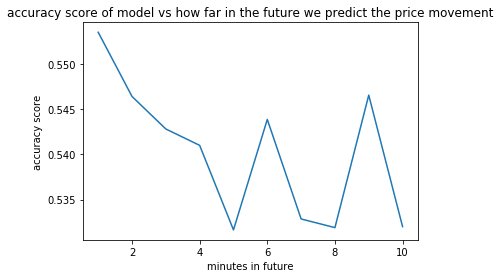

In [193]:
plt.plot([x for x in range(1,11)], accuracy_values)
plt.xlabel('minutes in future')
plt.ylabel('accuracy score')
plt.title('accuracy score of model vs how far in the future we predict the price movement')

We see the same thing again here with our accuracy score...

Now let's try an ARIMA (Auto Regressive Integrated Moving Average) model giving it features 10 minutes behind us. First without technical indicators. We should come back and test the hypothesis of a property that lets us predict x minutes in the future with similar accuracy to when we predict the next minute.

# ARIMA Model Without Technical Indicators

In [194]:
x.head()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,10088.5,10108.0,10108.5,10088.5,5189557.0,3859798.0,1329759.0,466922.0,198900.0,201.0,...,748.0,622.0,380.0,296.0,85.0,2.0,1.0,1053.0,297.0,3844.116296
2019-08-01 00:01:00,10107.5,10109.0,10120.0,10100.0,5792264.0,4627428.0,1164836.0,250962.0,116009.0,349.0,...,890.0,778.0,471.0,357.0,99.0,6.0,1.0,1166.0,512.0,3451.885578
2019-08-01 00:02:00,10108.5,10093.0,10109.0,10088.5,4974185.0,1213736.0,3760449.0,100000.0,218000.0,489.0,...,217.0,194.0,152.0,127.0,32.0,0.0,0.0,297.0,707.0,4954.367530
2019-08-01 00:03:00,10093.0,10111.5,10111.5,10093.0,1863787.0,1436924.0,426863.0,100000.0,100000.0,79.0,...,346.0,298.0,188.0,146.0,36.0,0.0,0.0,559.0,88.0,2880.659969
2019-08-01 00:04:00,10111.0,10106.0,10120.5,10105.0,3785526.0,2517687.0,1267839.0,212011.0,187830.0,303.0,...,393.0,334.0,211.0,164.0,55.0,4.0,1.0,579.0,450.0,3678.839650


In [223]:
arimaNoTaX = x.copy()

In [224]:
base_columns = arimaNoTaX.columns
arimaNoTaX.columns = [column + '_1' for column in arimaNoTaX.columns]

In [225]:
arimaNoTaX.columns

Index(['open_1', 'close_1', 'high_1', 'low_1', 'volume_1', 'buy_volume_1',
       'sell_volume_1', 'max_buy_1', 'max_sell_1', 'sell_50_1', 'sell_100_1',
       'sell_500_1', 'sell_1000_1', 'sell_10000_1', 'sell_100000_1',
       'sell_200000_1', 'buy_50_1', 'buy_100_1', 'buy_500_1', 'buy_1000_1',
       'buy_10000_1', 'buy_100000_1', 'buy_200000_1', 'buy_count_1',
       'sell_count_1', 'avg_volume_1'],
      dtype='object')

In [226]:
for i in range(2,12):
    for column in base_columns:
        arimaNoTaX[column + '_' + str(i)] = np.nan

In [227]:
len(arimaNoTaX.columns)

286

In [228]:
idx_ref = pd.DatetimeIndex(start=arimaNoTaX.index[0], end=arimaNoTaX.index[-1], freq='min')
idx_ref[~idx_ref.isin(arimaNoTaX.index)]

DatetimeIndex([], dtype='datetime64[ns]', freq='T')

In [229]:
# s = pd.Series([np.nan for x in range(len(x.columns))])
# s.name = np.datetime64(datetime.datetime.strptime('2019-06-28 12:00:00', '%Y-%m-%d %H:%M:%S'))

In [230]:
# x = x.append(s)

In [257]:
arimaNoTaX.loc[:,[column + '_10' for column in base_columns]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44605 entries, 2019-08-01 00:34:00 to 2019-08-31 23:58:00
Data columns (total 33 columns):
op_10           0 non-null float64
clo_10          0 non-null float64
hi_10           0 non-null float64
l_10            0 non-null float64
volu_10         0 non-null float64
buy_volu_10     0 non-null float64
sell_volu_10    0 non-null float64
max_b_10        0 non-null float64
max_se_10       0 non-null float64
sell__10        0 non-null float64
sell_1_10       0 non-null float64
sell_5_10       0 non-null float64
sell_10_10      0 non-null float64
sell_100_10     0 non-null float64
sell_1000_10    0 non-null float64
sell_2000_10    0 non-null float64
buy__10         0 non-null float64
buy_1_10        0 non-null float64
buy_5_10        0 non-null float64
buy_10_10       0 non-null float64
buy_100_10      0 non-null float64
buy_1000_10     0 non-null float64
buy_2000_10     0 non-null float64
buy_cou_10      0 non-null float64
sell_cou_10     

In [232]:
for i, row in arimaNoTaX[10:].iterrows():
    for j in range(2, 12):
        for column in base_columns:
            arimaNoTaX.at[i, column+'_'+str(j)] = arimaNoTaX.loc[i-datetime.timedelta(minutes=j-1), column+'_1']


In [233]:
arimaNoTaX.dropna(axis=0, inplace=True)

### Model

In [236]:
arimaNoTaX = arimaNoTaX.loc[y_future[1]]

In [240]:
minutesAhead = 1
scaler = StandardScaler()

xTrain, xTest, yTrain, yTest = train_test_split(arimaNoTaX.drop(y_future[minutesAhead].index[y_future[minutesAhead]['target'] == 0]), y_future[minutesAhead].drop(y_future[minutesAhead].index[y_future[minutesAhead]['target'] == 0]), test_size=0.2)
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.fit_transform(xTest)

In [241]:
clf = RandomForestClassifier()

test_params = {
 'max_depth':[2,4,6],
 'n_estimators':[10,50,100]
}

clf = GridSearchCV(estimator = clf,param_grid = test_params, cv=5)
clf.fit(xTrain, yTrain.values.ravel())
print(clf.best_params_)

{'max_depth': 6, 'n_estimators': 100}


In [242]:
clf = RandomForestClassifier(max_depth=6, n_estimators=100)
clf.fit(xTrain, yTrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [243]:
y_pred = clf.predict(xTest)
print(f1_score(yTest, y_pred))
print(balanced_accuracy_score(yTest, y_pred))
print(accuracy_score(yTest, y_pred))
print(confusion_matrix(yTest, y_pred))

0.2808527283395267
0.5389376843710729
0.5878264768523708
[[4526  554]
 [3123  718]]


In [244]:
clf = xgb.XGBClassifier(max_depth=6, n_estimators=100)
clf.fit(xTrain, yTrain.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [245]:
y_pred = clf.predict(xTest)
print(f1_score(yTest, y_pred))
print(balanced_accuracy_score(yTest, y_pred))
print(accuracy_score(yTest, y_pred))
print(confusion_matrix(yTest, y_pred))

0.4133766836971667
0.5475033414854645
0.5752718305122744
[[3797 1283]
 [2506 1335]]


# ARIMA Model WITH Technical Indicators

In [301]:
arimaTaX = x.copy()

In [302]:
ema = pd.DataFrame(talib.EMA(np.array(arimaTaX.close), timeperiod=3))
tema = pd.DataFrame(talib.TEMA(np.array(arimaTaX.close), timeperiod=3))
rsi = pd.DataFrame(talib.RSI(np.array(arimaTaX.close), timeperiod=3))
rocrsi = pd.DataFrame(talib.ROC(talib.RSI(np.array(arimaTaX.close), timeperiod=3), timeperiod=3))
rocema = pd.DataFrame(talib.ROC(talib.EMA(np.array(arimaTaX.close), timeperiod=3), timeperiod=3))
roctema = pd.DataFrame(talib.ROC(talib.TEMA(np.array(arimaTaX.close), timeperiod=3), timeperiod=3))

In [303]:
arimaTaX.columns = [column + '_1' for column in arimaTaX.columns]

In [304]:
arimaTaX['ema_1'] = ema.shift(periods=1).values
arimaTaX['tema_1'] = tema.shift(periods=1).values
arimaTaX['rsi_1'] = rsi.shift(periods=1).values
arimaTaX['rocrsi_1'] = rocrsi.shift(periods=1).values
arimaTaX['rocema_1'] = rocema.shift(periods=1).values
arimaTaX['roctema_1'] = roctema.shift(periods=1).values
arimaTaX['macd_1'] = pd.DataFrame(macd).shift(periods=1).values

In [305]:
base_columns = [word[:-2] for word in arimaTaX.columns]
for i in range(2,12):
    for column in base_columns:
        arimaTaX[column + '_' + str(i)] = np.nan

In [306]:
arimaTaX.columns

Index(['open_1', 'close_1', 'high_1', 'low_1', 'volume_1', 'buy_volume_1',
       'sell_volume_1', 'max_buy_1', 'max_sell_1', 'sell_50_1',
       ...
       'buy_count_11', 'sell_count_11', 'avg_volume_11', 'ema_11', 'tema_11',
       'rsi_11', 'rocrsi_11', 'rocema_11', 'roctema_11', 'macd_11'],
      dtype='object', length=363)

In [307]:
arimaTaX.loc[:,[column + '_1' for column in base_columns]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44639 entries, 2019-08-01 00:00:00 to 2019-08-31 23:58:00
Data columns (total 33 columns):
open_1           44639 non-null float64
close_1          44639 non-null float64
high_1           44639 non-null float64
low_1            44639 non-null float64
volume_1         44639 non-null float64
buy_volume_1     44639 non-null float64
sell_volume_1    44639 non-null float64
max_buy_1        44639 non-null float64
max_sell_1       44639 non-null float64
sell_50_1        44639 non-null float64
sell_100_1       44639 non-null float64
sell_500_1       44639 non-null float64
sell_1000_1      44639 non-null float64
sell_10000_1     44639 non-null float64
sell_100000_1    44639 non-null float64
sell_200000_1    44639 non-null float64
buy_50_1         44639 non-null float64
buy_100_1        44639 non-null float64
buy_500_1        44639 non-null float64
buy_1000_1       44639 non-null float64
buy_10000_1      44639 non-null float64
buy_100000_1    

In [308]:
for i, row in arimaTaX[10:].iterrows():
    for j in range(2, 12):
        for column in base_columns:
            arimaTaX.at[i, column+'_'+str(j)] = arimaTaX.loc[i-datetime.timedelta(minutes=j-1), column+'_1']

In [316]:
arimaTaX.dropna(axis=0, inplace=True)

### Model

In [319]:
arimaTaX = arimaTaX.loc[y_future[1].index,:]

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [320]:
minutesAhead = 1
scaler = StandardScaler()

xTrain, xTest, yTrain, yTest = train_test_split(arimaTaX.drop(y_future[minutesAhead].index[y_future[minutesAhead]['target'] == 0]), y_future[minutesAhead].drop(y_future[minutesAhead].index[y_future[minutesAhead]['target'] == 0]), test_size=0.2)
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.fit_transform(xTest)

In [321]:
print(len(arimaTaX))
print(len(arimaTaX.dropna(axis=0)))

44605
44595


In [323]:
np.isnan(xTrain).any()

True

In [322]:
clf = RandomForestClassifier()

test_params = {
 'max_depth':[2,4,6],
 'n_estimators':[10,50,100]
}

clf = GridSearchCV(estimator = clf,param_grid = test_params, cv=5)
clf.fit(xTrain, yTrain.values.ravel())
print(clf.best_params_)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').